In [61]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [62]:
car_rental_data = pd.read_csv("../Data/new_carrental_features.csv")

In [63]:
car_rental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27693 entries, 0 to 27692
Data columns (total 16 columns):
AVG_BEFORE_DAYS       27693 non-null float64
AVG_FARE              27693 non-null float64
CHANGE PERCENT        27693 non-null float64
COLLECT_DATE          27693 non-null object
HOLIDAY               27693 non-null int64
HOLIDAY AFTER         27693 non-null int64
HOLIDAY BEFORE        27693 non-null int64
LOR                   27693 non-null int64
MAX_FARE              27693 non-null float64
MEDIAN_FARE           27693 non-null float64
MIN_FARE              27693 non-null float64
OUTSIPP               27693 non-null object
PICKUP_DATE           27693 non-null object
TIME BEFORE RENTAL    27693 non-null int64
WEEKEND               27693 non-null int64
CHANGE                27693 non-null object
dtypes: float64(6), int64(6), object(4)
memory usage: 3.4+ MB


In [64]:
# Coverting column types and dropping the right columns
car_rental_data["COLLECT_DATE"] = pd.to_datetime(car_rental_data["COLLECT_DATE"], format='%Y-%m-%d')
car_rental_data["PICKUP_DATE"] = pd.to_datetime(car_rental_data["PICKUP_DATE"], format='%Y-%m-%d')
#car_rental_data.drop(columns = "Unnamed: 0", inplace = True)

# Sorting by pickup date
car_rental_data.sort_values(by = "PICKUP_DATE", inplace=True)

In [65]:
car_rental_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27693 entries, 0 to 18309
Data columns (total 16 columns):
AVG_BEFORE_DAYS       27693 non-null float64
AVG_FARE              27693 non-null float64
CHANGE PERCENT        27693 non-null float64
COLLECT_DATE          27693 non-null datetime64[ns]
HOLIDAY               27693 non-null int64
HOLIDAY AFTER         27693 non-null int64
HOLIDAY BEFORE        27693 non-null int64
LOR                   27693 non-null int64
MAX_FARE              27693 non-null float64
MEDIAN_FARE           27693 non-null float64
MIN_FARE              27693 non-null float64
OUTSIPP               27693 non-null object
PICKUP_DATE           27693 non-null datetime64[ns]
TIME BEFORE RENTAL    27693 non-null int64
WEEKEND               27693 non-null int64
CHANGE                27693 non-null object
dtypes: datetime64[ns](2), float64(6), int64(6), object(2)
memory usage: 3.6+ MB


In [66]:
car_rental_data.head()

AVG_BEFORE_DAYS  AVG_FARE  CHANGE PERCENT COLLECT_DATE  HOLIDAY  \
0                45.80     45.80             0.0   2017-12-31        0   
5643            129.23    129.23             0.0   2017-12-31        0   
1412             45.78     45.78             0.0   2017-12-31        0   
22010            34.21     34.21             0.0   2017-12-31        0   
9171            104.51    104.51             0.0   2017-12-31        0   

       HOLIDAY AFTER  HOLIDAY BEFORE  LOR  MAX_FARE  MEDIAN_FARE   MIN_FARE  \
0                  0               0    6   105.136    31.526000  19.772857   
5643               0               0    6   203.670   114.314000  57.787143   
1412               0               0    6   104.070    31.727857  19.734286   
22010              0               0    5    39.260    36.632500  22.915000   
9171               0               0    6   130.140   108.885000  78.261667   

      OUTSIPP PICKUP_DATE  TIME BEFORE RENTAL  WEEKEND     CHANGE  
0        CCAR  2018-01-30                  30        0  No change  
5643     FVAR  2018-01-30                  30        0  No change  
1412     ECAR  2018-01-30                  30        0  No change  
22010    CDAR  2018-01-30                  30        0  No change  
9171     LSAR  2018-01-30                  30        0  No change

*****
Reduce outsipp to 5 logical categories

In [10]:
temp1 = car_rental_data.loc[:,["OUTSIPP" , "AVG_FARE"]].groupby("OUTSIPP")["AVG_FARE"].mean()
temp1[:5]

OUTSIPP
CCAR     63.689617
CDAR     59.771463
CFAR     70.709957
CTAR    122.003715
ECAR     63.491191
Name: AVG_FARE, dtype: float64

In [11]:
temp1.describe()

count     59.000000
mean     108.767105
std       80.779448
min       49.092145
25%       67.115521
50%       85.943560
75%      120.135808
max      509.005000
Name: AVG_FARE, dtype: float64

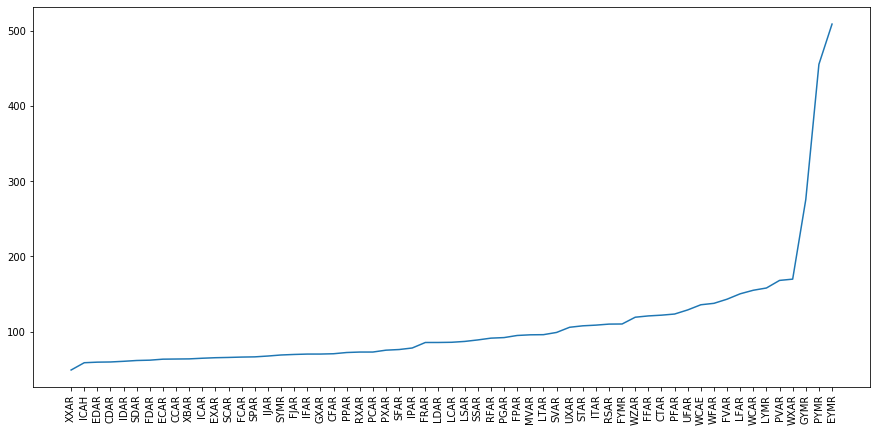

In [12]:
plt.figure(figsize=(15,7))
plt.plot(temp1.sort_values())
plt.xticks(rotation = 90)
plt.show()

In [15]:
temp1 = temp1.drop(["GYMR" , "PYMR" , "EYMR"] , axis = 0)

KeyError: "['GYMR' 'PYMR' 'EYMR'] not found in axis"

In [ ]:
# premium > luxury > midrange> economy > basic

ref1 = pd.qcut(temp1 , 4 , labels = [ "basic" , "economy" , "midrange" , "luxury"])
ref1 = ref.append(pd.Series( data = ["premium","premium","premium"] , index =["GYMR" , "PYMR" , "EYMR"]))
ref1[:5]

*****
Second scheme

In [30]:
temp2 = car_rental_data.loc[:,["OUTSIPP" , "AVG_FARE"]].groupby("OUTSIPP")["AVG_FARE"].mean()
ref = temp2.sort_values().reset_index()
ref2 = pd.Series( data = ref.index/sum(ref.index) , index=ref["OUTSIPP"])
ref2[:5]

OUTSIPP
XXAR    0.000000
ICAH    0.000565
EDAR    0.001130
CDAR    0.001695
IDAR    0.002260
dtype: float64

In [31]:
#Choose ref1 or ref2
ref = ref2

In [32]:
car_rental_data["new_OUTSIPP"] = ref[car_rental_data["OUTSIPP"]].to_list()

In [33]:
orig_car_rental_data = car_rental_data[:]

In [34]:
car_rental_data = car_rental_data.drop(columns = "OUTSIPP")
car_rental_data.columns

Index(['AVG_BEFORE_DAYS', 'AVG_FARE', 'CHANGE PERCENT', 'COLLECT_DATE',
       'HOLIDAY', 'HOLIDAY AFTER', 'HOLIDAY BEFORE', 'LOR', 'MAX_FARE',
       'MEDIAN_FARE', 'MIN_FARE', 'PICKUP_DATE', 'TIME BEFORE RENTAL',
       'WEEKEND', 'CHANGE', 'PICKUP_DATE_YEAR', 'PICKUP_DATE_MONTH',
       'PICKUP_DATE_DATE', 'new_OUTSIPP'],
      dtype='object')

In [35]:
car_rental_data.head()

AVG_BEFORE_DAYS  AVG_FARE  CHANGE PERCENT COLLECT_DATE  HOLIDAY  \
0                45.80     45.80             0.0   2017-12-31        0   
5643            129.23    129.23             0.0   2017-12-31        0   
1412             45.78     45.78             0.0   2017-12-31        0   
22010            34.21     34.21             0.0   2017-12-31        0   
9171            104.51    104.51             0.0   2017-12-31        0   

       HOLIDAY AFTER  HOLIDAY BEFORE  LOR  MAX_FARE  MEDIAN_FARE   MIN_FARE  \
0                  0               0    6   105.136    31.526000  19.772857   
5643               0               0    6   203.670   114.314000  57.787143   
1412               0               0    6   104.070    31.727857  19.734286   
22010              0               0    5    39.260    36.632500  22.915000   
9171               0               0    6   130.140   108.885000  78.261667   

      PICKUP_DATE  TIME BEFORE RENTAL  WEEKEND     CHANGE  PICKUP_DATE_YEAR  \
0      2018-01-30                  30        0  No change              2018   
5643   2018-01-30                  30        0  No change              2018   
1412   2018-01-30                  30        0  No change              2018   
22010  2018-01-30                  30        0  No change              2018   
9171   2018-01-30                  30        0  No change              2018   

       PICKUP_DATE_MONTH  PICKUP_DATE_DATE  new_OUTSIPP  
0                      1                30     0.004520  
5643                   1                30     0.028249  
1412                   1                30     0.003955  
22010                  1                30     0.001695  
9171                   1                30     0.016949

In [36]:
car_rental_data.isnull().sum()

AVG_BEFORE_DAYS       0
AVG_FARE              0
CHANGE PERCENT        0
COLLECT_DATE          0
HOLIDAY               0
HOLIDAY AFTER         0
HOLIDAY BEFORE        0
LOR                   0
MAX_FARE              0
MEDIAN_FARE           0
MIN_FARE              0
PICKUP_DATE           0
TIME BEFORE RENTAL    0
WEEKEND               0
CHANGE                0
PICKUP_DATE_YEAR      0
PICKUP_DATE_MONTH     0
PICKUP_DATE_DATE      0
new_OUTSIPP           0
dtype: int64

In [37]:
car_rental_data.dropna(inplace=True)

In [38]:
print("Min: " , min(car_rental_data["PICKUP_DATE"]), "\nMax: ", max(car_rental_data["PICKUP_DATE"]))

Min:  2018-01-30 00:00:00 
Max:  2020-01-29 00:00:00


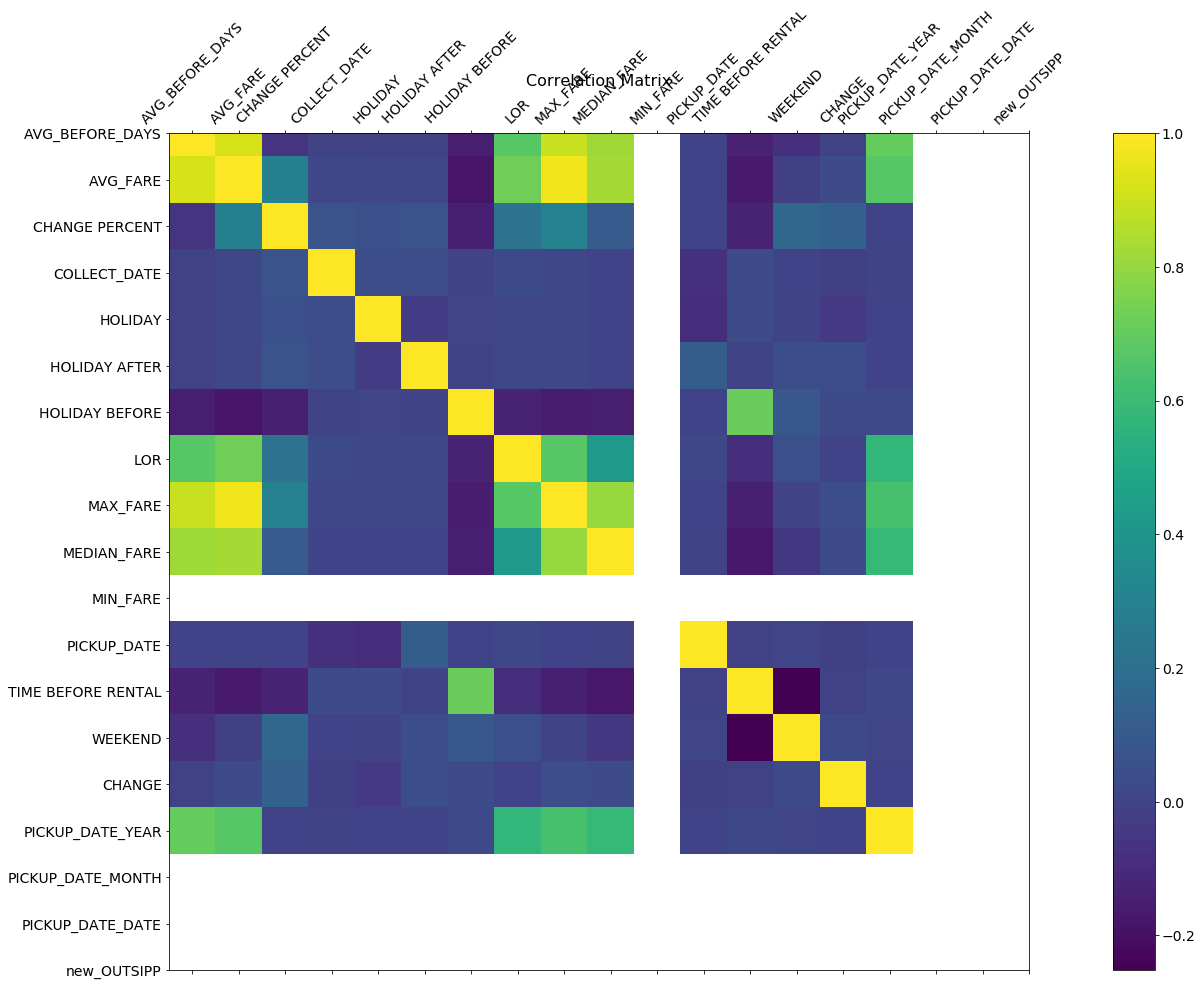

In [39]:
# Checking for correlations
f = plt.figure(figsize=(30, 15))
plt.matshow(car_rental_data.corr(), fignum=f.number)
plt.xticks(range(car_rental_data.shape[1]), car_rental_data.columns, fontsize=14, rotation=45)
plt.yticks(range(car_rental_data.shape[1]), car_rental_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### are we dropping any columns based on corr? Why is NaN

In [40]:
corr = car_rental_data.corr()
corr.style.background_gradient(cmap='coolwarm')

E:\Anaconda\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


# Extracting, converting the features

In [67]:
# Extracting year, month and date from pickup date
car_rental_data["PICKUP_DATE_YEAR"] = pd.DatetimeIndex(car_rental_data["PICKUP_DATE"]).year
car_rental_data["PICKUP_DATE_MONTH"] = pd.DatetimeIndex(car_rental_data["PICKUP_DATE"]).month
car_rental_data["PICKUP_DATE_DATE"] = pd.DatetimeIndex(car_rental_data["PICKUP_DATE"]).day

In [68]:
car_rental_data.columns

Index(['AVG_BEFORE_DAYS', 'AVG_FARE', 'CHANGE PERCENT', 'COLLECT_DATE',
       'HOLIDAY', 'HOLIDAY AFTER', 'HOLIDAY BEFORE', 'LOR', 'MAX_FARE',
       'MEDIAN_FARE', 'MIN_FARE', 'OUTSIPP', 'PICKUP_DATE',
       'TIME BEFORE RENTAL', 'WEEKEND', 'CHANGE', 'PICKUP_DATE_YEAR',
       'PICKUP_DATE_MONTH', 'PICKUP_DATE_DATE'],
      dtype='object')

In [70]:
# converting car_type to one-hot encoded format
car_rental_data = pd.get_dummies(car_rental_data, columns = ["OUTSIPP"] , prefix = "OUTSIPP", drop_first=True)

In [71]:
car_rental_data.head()

AVG_BEFORE_DAYS  AVG_FARE  CHANGE PERCENT COLLECT_DATE  HOLIDAY  \
0                45.80     45.80             0.0   2017-12-31        0   
5643            129.23    129.23             0.0   2017-12-31        0   
1412             45.78     45.78             0.0   2017-12-31        0   
22010            34.21     34.21             0.0   2017-12-31        0   
9171            104.51    104.51             0.0   2017-12-31        0   

       HOLIDAY AFTER  HOLIDAY BEFORE  LOR  MAX_FARE  MEDIAN_FARE  ...  \
0                  0               0    6   105.136    31.526000  ...   
5643               0               0    6   203.670   114.314000  ...   
1412               0               0    6   104.070    31.727857  ...   
22010              0               0    5    39.260    36.632500  ...   
9171               0               0    6   130.140   108.885000  ...   

       OUTSIPP_UFAR OUTSIPP_UXAR  OUTSIPP_WCAE  OUTSIPP_WCAR OUTSIPP_WFAR  \
0                 0            0             0             0            0   
5643              0            0             0             0            0   
1412              0            0             0             0            0   
22010             0            0             0             0            0   
9171              0            0             0             0            0   

       OUTSIPP_WXAR  OUTSIPP_WZAR  OUTSIPP_XBAR  OUTSIPP_XFAR  OUTSIPP_XXAR  
0                 0             0             0             0             0  
5643              0             0             0             0             0  
1412              0             0             0             0             0  
22010             0             0             0             0             0  
9171              0             0             0             0             0  

[5 rows x 77 columns]

In [72]:
car_rental_data.columns

Index(['AVG_BEFORE_DAYS', 'AVG_FARE', 'CHANGE PERCENT', 'COLLECT_DATE',
       'HOLIDAY', 'HOLIDAY AFTER', 'HOLIDAY BEFORE', 'LOR', 'MAX_FARE',
       'MEDIAN_FARE', 'MIN_FARE', 'PICKUP_DATE', 'TIME BEFORE RENTAL',
       'WEEKEND', 'CHANGE', 'PICKUP_DATE_YEAR', 'PICKUP_DATE_MONTH',
       'PICKUP_DATE_DATE', 'OUTSIPP_CDAR', 'OUTSIPP_CFAR', 'OUTSIPP_CTAR',
       'OUTSIPP_ECAR', 'OUTSIPP_EDAR', 'OUTSIPP_EXAR', 'OUTSIPP_EYMR',
       'OUTSIPP_FCAR', 'OUTSIPP_FDAR', 'OUTSIPP_FFAR', 'OUTSIPP_FJAR',
       'OUTSIPP_FPAR', 'OUTSIPP_FRAR', 'OUTSIPP_FVAR', 'OUTSIPP_FYMR',
       'OUTSIPP_GXAR', 'OUTSIPP_GYMR', 'OUTSIPP_ICAH', 'OUTSIPP_ICAR',
       'OUTSIPP_IDAR', 'OUTSIPP_IFAR', 'OUTSIPP_IJAR', 'OUTSIPP_IPAR',
       'OUTSIPP_ITAR', 'OUTSIPP_LCAR', 'OUTSIPP_LDAR', 'OUTSIPP_LFAR',
       'OUTSIPP_LSAR', 'OUTSIPP_LTAR', 'OUTSIPP_LYMR', 'OUTSIPP_MVAR',
       'OUTSIPP_PCAR', 'OUTSIPP_PFAR', 'OUTSIPP_PGAR', 'OUTSIPP_PPAR',
       'OUTSIPP_PVAR', 'OUTSIPP_PXAR', 'OUTSIPP_PYMR', 'OUTSIPP_RFAR',
  

In [73]:
# Filtering features and creating a copy
classification_drop_features = ["AVG_FARE","COLLECT_DATE","LOR", 'MAX_FARE', 'MEDIAN_FARE',
       'MIN_FARE', 'PICKUP_DATE', 'TIME BEFORE RENTAL', "CHANGE PERCENT"]
classification_data = car_rental_data.copy()
classification_data.drop(columns = classification_drop_features, inplace=True)

In [74]:
classification_data.head()

AVG_BEFORE_DAYS  HOLIDAY  HOLIDAY AFTER  HOLIDAY BEFORE  WEEKEND  \
0                45.80        0              0               0        0   
5643            129.23        0              0               0        0   
1412             45.78        0              0               0        0   
22010            34.21        0              0               0        0   
9171            104.51        0              0               0        0   

          CHANGE  PICKUP_DATE_YEAR  PICKUP_DATE_MONTH  PICKUP_DATE_DATE  \
0      No change              2018                  1                30   
5643   No change              2018                  1                30   
1412   No change              2018                  1                30   
22010  No change              2018                  1                30   
9171   No change              2018                  1                30   

       OUTSIPP_CDAR  ...  OUTSIPP_UFAR  OUTSIPP_UXAR  OUTSIPP_WCAE  \
0                 0  ...             0             0             0   
5643              0  ...             0             0             0   
1412              0  ...             0             0             0   
22010             1  ...             0             0             0   
9171              0  ...             0             0             0   

       OUTSIPP_WCAR  OUTSIPP_WFAR  OUTSIPP_WXAR  OUTSIPP_WZAR  OUTSIPP_XBAR  \
0                 0             0             0             0             0   
5643              0             0             0             0             0   
1412              0             0             0             0             0   
22010             0             0             0             0             0   
9171              0             0             0             0             0   

       OUTSIPP_XFAR  OUTSIPP_XXAR  
0                 0             0  
5643              0             0  
1412              0             0  
22010             0             0  
9171              0             0  

[5 rows x 68 columns]

In [75]:
# Extracting columns
classification_columns = [x for x in classification_data.columns.to_list() if x != "CHANGE"]
X = classification_data[classification_columns]
y = classification_data["CHANGE"]

In [76]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

In [77]:
# Checking correct sort order for train test splits
print("Min train date:", min(X_train["PICKUP_DATE_YEAR"]*100 + X_train["PICKUP_DATE_MONTH"]))
print("Max train date:", max(X_train["PICKUP_DATE_YEAR"]*100 + X_train["PICKUP_DATE_MONTH"]))

Min train date: 201801
Max train date: 201907


In [78]:
X_train.head()

AVG_BEFORE_DAYS  HOLIDAY  HOLIDAY AFTER  HOLIDAY BEFORE  WEEKEND  \
0                45.80        0              0               0        0   
5643            129.23        0              0               0        0   
1412             45.78        0              0               0        0   
22010            34.21        0              0               0        0   
9171            104.51        0              0               0        0   

       PICKUP_DATE_YEAR  PICKUP_DATE_MONTH  PICKUP_DATE_DATE  OUTSIPP_CDAR  \
0                  2018                  1                30             0   
5643               2018                  1                30             0   
1412               2018                  1                30             0   
22010              2018                  1                30             1   
9171               2018                  1                30             0   

       OUTSIPP_CFAR  ...  OUTSIPP_UFAR  OUTSIPP_UXAR  OUTSIPP_WCAE  \
0                 0  ...             0             0             0   
5643              0  ...             0             0             0   
1412              0  ...             0             0             0   
22010             0  ...             0             0             0   
9171              0  ...             0             0             0   

       OUTSIPP_WCAR  OUTSIPP_WFAR  OUTSIPP_WXAR  OUTSIPP_WZAR  OUTSIPP_XBAR  \
0                 0             0             0             0             0   
5643              0             0             0             0             0   
1412              0             0             0             0             0   
22010             0             0             0             0             0   
9171              0             0             0             0             0   

       OUTSIPP_XFAR  OUTSIPP_XXAR  
0                 0             0  
5643              0             0  
1412              0             0  
22010             0             0  
9171              0             0  

[5 rows x 67 columns]

## Scaling data

In [83]:
classification_data.columns

Index(['AVG_BEFORE_DAYS', 'HOLIDAY', 'HOLIDAY AFTER', 'HOLIDAY BEFORE',
       'WEEKEND', 'CHANGE', 'PICKUP_DATE_YEAR', 'PICKUP_DATE_MONTH',
       'PICKUP_DATE_DATE', 'OUTSIPP_CDAR', 'OUTSIPP_CFAR', 'OUTSIPP_CTAR',
       'OUTSIPP_ECAR', 'OUTSIPP_EDAR', 'OUTSIPP_EXAR', 'OUTSIPP_EYMR',
       'OUTSIPP_FCAR', 'OUTSIPP_FDAR', 'OUTSIPP_FFAR', 'OUTSIPP_FJAR',
       'OUTSIPP_FPAR', 'OUTSIPP_FRAR', 'OUTSIPP_FVAR', 'OUTSIPP_FYMR',
       'OUTSIPP_GXAR', 'OUTSIPP_GYMR', 'OUTSIPP_ICAH', 'OUTSIPP_ICAR',
       'OUTSIPP_IDAR', 'OUTSIPP_IFAR', 'OUTSIPP_IJAR', 'OUTSIPP_IPAR',
       'OUTSIPP_ITAR', 'OUTSIPP_LCAR', 'OUTSIPP_LDAR', 'OUTSIPP_LFAR',
       'OUTSIPP_LSAR', 'OUTSIPP_LTAR', 'OUTSIPP_LYMR', 'OUTSIPP_MVAR',
       'OUTSIPP_PCAR', 'OUTSIPP_PFAR', 'OUTSIPP_PGAR', 'OUTSIPP_PPAR',
       'OUTSIPP_PVAR', 'OUTSIPP_PXAR', 'OUTSIPP_PYMR', 'OUTSIPP_RFAR',
       'OUTSIPP_RSAR', 'OUTSIPP_RXAR', 'OUTSIPP_SCAR', 'OUTSIPP_SDAR',
       'OUTSIPP_SFAR', 'OUTSIPP_SPAR', 'OUTSIPP_SSAR', 'OUTSIPP_STAR',
   

In [84]:
# classification_data[["AVG_BEFORE_DAYS", "CHANGE PERCENT"]].head(20)
#classification_data[["AVG_BEFORE_DAYS"]].head(20)

In [85]:
# Scaling AVG_BEFORE_DAYS and CHANGE PERCENT
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# classification_data[["AVG_BEFORE_DAYS", "CHANGE PERCENT"]] = scaler.fit_transform(classification_data[["AVG_BEFORE_DAYS", "CHANGE PERCENT"]])
classification_data[["AVG_BEFORE_DAYS"]] = scaler.fit_transform(classification_data[["AVG_BEFORE_DAYS"]])

In [86]:
# classification_data[["AVG_BEFORE_DAYS", "CHANGE PERCENT"]].head(20)
classification_data[["AVG_BEFORE_DAYS"]].head(20)

AVG_BEFORE_DAYS
0            -1.128528
5643          0.829758
1412         -1.128998
22010        -1.400571
9171          0.249525
11995        -0.214286
20308         2.938266
15506         0.608884
11289         0.247882
20610         1.608331
22220        -1.293538
22052        -1.409960
4942         -0.185885
3530          0.215021
4236          0.406319
22178         0.134746
16212        -1.069144
10583        -0.789590
21305        -1.643039
22136        -1.336023

# Machine Learning - Random Forest

In [87]:
# Importing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score, make_scorer

In [88]:
# Default model
default = RandomForestClassifier(random_state=1)
default.fit(X_train, y_train)
default_pred = default.predict(X_test)
print("Accuracy for default Random Forest on CV data: ",accuracy_score(y_test,default_pred))
print()
print("Balanced Accuracy for default Random Forest on CV data: ",balanced_accuracy_score(y_test,default_pred))
print()
for x, y in zip(X_train.columns.tolist(), default.feature_importances_):
    print(x,round(y,2))
print()
#print("AUC", roc_auc_score(y_test, default.predict_proba(X_test)[:,1]))

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy for default Random Forest on CV data:  0.39552238805970147

Balanced Accuracy for default Random Forest on CV data:  0.42453758584562523

AVG_BEFORE_DAYS 0.28
HOLIDAY 0.01
HOLIDAY AFTER 0.01
HOLIDAY BEFORE 0.01
WEEKEND 0.02
PICKUP_DATE_YEAR 0.03
PICKUP_DATE_MONTH 0.21
PICKUP_DATE_DATE 0.21
OUTSIPP_CDAR 0.0
OUTSIPP_CFAR 0.0
OUTSIPP_CTAR 0.0
OUTSIPP_ECAR 0.0
OUTSIPP_EDAR 0.0
OUTSIPP_EXAR 0.0
OUTSIPP_EYMR 0.0
OUTSIPP_FCAR 0.0
OUTSIPP_FDAR 0.0
OUTSIPP_FFAR 0.01
OUTSIPP_FJAR 0.0
OUTSIPP_FPAR 0.01
OUTSIPP_FRAR 0.01
OUTSIPP_FVAR 0.01
OUTSIPP_FYMR 0.0
OUTSIPP_GXAR 0.01
OUTSIPP_GYMR 0.0
OUTSIPP_ICAH 0.0
OUTSIPP_ICAR 0.0
OUTSIPP_IDAR 0.0
OUTSIPP_IFAR 0.0
OUTSIPP_IJAR 0.01
OUTSIPP_IPAR 0.0
OUTSIPP_ITAR 0.0
OUTSIPP_LCAR 0.01
OUTSIPP_LDAR 0.0
OUTSIPP_LFAR 0.01
OUTSIPP_LSAR 0.01
OUTSIPP_LTAR 0.01
OUTSIPP_LYMR 0.0
OUTSIPP_MVAR 0.01
OUTSIPP_PCAR 0.01
OUTSIPP_PFAR 0.01
OUTSIPP_PGAR 0.01
OUTSIPP_PPAR 0.01
OUTSIPP_PVAR 0.0
OUTSIPP_PXAR 0.01
OUTSIPP_PYMR 0.0
OUTSIPP_RFAR 0.01
OUTSIPP_RSAR 0.01
OU

In [89]:
%timeit
rfc = RandomForestClassifier(random_state=1)
# Setting grid parameters
n_estimators = [100, 200, 300, 500, 800]
max_depth = [None, 4, 5, 6, 7, 8, 9, 10]
max_features = ['auto', 'sqrt', 'log2']
# min_samples_split = [2, 5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10]
criterion = ['gini', 'entropy']


parameters = dict(n_estimators = n_estimators, max_depth = max_depth,
                  criterion = criterion, max_features = max_features)

gridF = GridSearchCV(estimator = rfc, param_grid = parameters, cv = 5, verbose = 1,
                      n_jobs = -1)
gridF.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [90]:
# Best parameters
gridF.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
# Reinitializing the best model
best_model = RandomForestClassifier(random_state=1, criterion="entropy", max_depth=4, max_features="log2", 
                                   n_estimators=500)
best_model.fit(X_train,y_train)

In [91]:
pred_train = best_model.predict(X_train)
print("Accuracy for best Random Forest on train data: ",accuracy_score(y_train,pred_train))

Accuracy for best Random Forest on train data:  0.44983234459633736


With scheme 2, If you check, the training accuracy is 51% which is considerably low... Model is not able to learn properly

With OHE of OUTSIPP, the training accuracy is 44% which is considerably low. (Without scaling) (Exactly same with scaling)

In [92]:
pred = best_model.predict(X_test)
print("Accuracy for best Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for best Random Forest on CV data:  0.4687048627828599


In [93]:
print("Balanced Accuracy for default Random Forest on CV data: ",balanced_accuracy_score(y_test,pred))

Balanced Accuracy for default Random Forest on CV data:  0.37907748472251157


In [94]:
print("AUC", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))

ValueError: multiclass format is not supported

In [ ]:
for x, y in zip(X_train.columns.tolist(), best_model.feature_importances_):
    print(x,round(y,2))

## Extracting the data for classification

In [ ]:
classification_data = classification_data.reset_index(drop=True)
classification_data.to_csv("classification_data.csv")